In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\VIRAJ KAMAT\Desktop\Data Science\Assignments\Random Forest classification\Fraud_check.csv")
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [3]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [5]:
df = df.rename({'Taxable.Income':'Taxable_income'},axis=1)

In [6]:
df = pd.get_dummies(df)
df['Taxable_income'] = pd.cut(df['Taxable_income'], bins=[10000,30000,np.inf], labels=['Risky','Good'],include_lowest=True)


In [7]:
df.head()

,Taxable_income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,Good,50047,10,1,0,0,0,1,0,1
1,Good,134075,18,0,1,1,0,0,0,1
2,Good,160205,30,1,0,0,1,0,0,1
3,Good,193264,15,0,1,0,0,1,0,1
4,Good,27533,28,1,0,0,1,0,1,0


In [8]:
array = df.values

In [9]:
x = array[:,1:]
y = array[:,0]

## Building Random Forest Classifier Model

In [10]:
kfold = KFold(n_splits=10)
model = RandomForestClassifier(n_estimators=100, max_features=3)
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean()*100)

73.33333333333333


model accuracy is 73%

In [11]:
X = df.iloc[:,1:]
Y = df.iloc[:,0]

In [12]:
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.3)

In [13]:
model1 = RandomForestClassifier(n_estimators=100)
model1.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [14]:
model1.feature_importances_

array([0.52530694, 0.34968817, 0.01421066, 0.01361993, 0.01627191,
       0.02429585, 0.01897885, 0.01850489, 0.0191228 ])

In [15]:
import shap

In [16]:
explainer = shap.TreeExplainer(model1)
shap_values = explainer.shap_values(X_test)

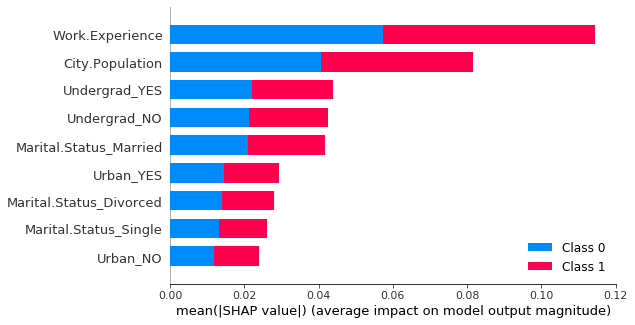

In [17]:
shap.summary_plot(shap_values, X_test, plot_type="bar")